In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
from vpython import *
import cv2

In [24]:
%load_ext autoreload
%autoreload 2
import HEAD_RECON

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
head =HEAD_RECON.threeD_head.read_from_file(3,6)
head.reset_filters()

47222
47024
46849
46695
46559
46434
46322
46239
46167
46112
46072
46040
46018
46005
45999
45995
45993
45993


In [61]:
#head.sparsify(0.3)
head.filter_nan()
head.filter_depth(0.5)

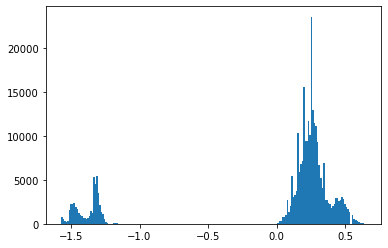

In [60]:
plt.hist(head.xyz[:,2], bins=200)
plt.show()

In [67]:

head.remove_dangling()
head.remove_background_color()


In [65]:
head.filter_depth(-0.5)
head.center()

In [66]:

head.center()
head.create_vpython_spheres()
head.save()

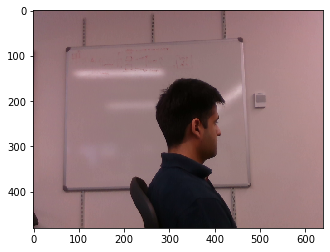

In [55]:
plt.imshow(head.twoD_image)
plt.show()

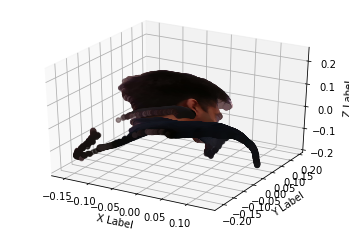

In [29]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

ax.scatter(head.xyz[:,0], -head.xyz[:,2], -head.xyz[:,1], c=head.rgb)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [30]:
head.xy_mesh

array([ 97607,  97608,  97609, ..., 307003, 307004, 307005])

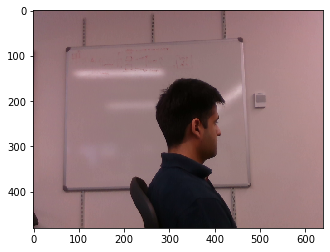

In [32]:
im,path1 = head.get_filtered_image()

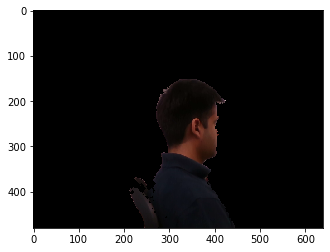

In [375]:
plt.imshow(im);plt.show()

In [34]:
head.save()

In [35]:
im_save_path = "head_3_6.png"
plt.imsave(im_save_path,im)

In [371]:
head1 = HEAD_RECON.threeD_head.read_from_file(1,4)
head2 = HEAD_RECON.threeD_head.read_from_file(1,5)

In [372]:
head1.full_filter()
head2.full_filter()

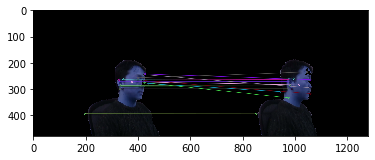

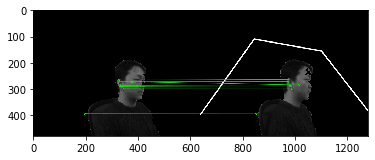

[0.057 0.205 0.988]
[0.044 0.184 0.959]


In [373]:
heads = multi_head.MultiHead.joined_heads(head1, head2)

print(head1.center_pos)
print(head2.center_pos)

In [370]:
img1,path1 = head1.get_filtered_image()
img2,path2 = head2.get_filtered_image()

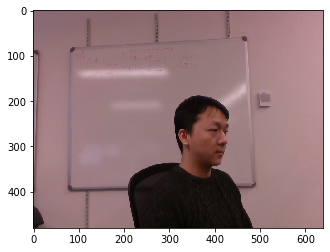

In [348]:
plt.imshow(head1.twoD_image)

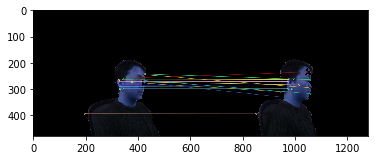

In [369]:
# test
kp1, des1 = HEAD_RECON.estimate_frame_transform.get_descriptors(path1)
kp2, des2 = HEAD_RECON.estimate_frame_transform.get_descriptors(path2)
good_without_list = HEAD_RECON.estimate_frame_transform.get_matched_points(path1,kp1,des1,path2,kp2,des2,0.8)


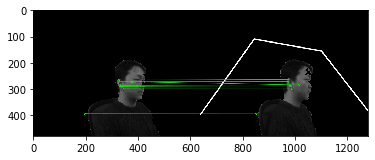

In [350]:
cleaned_match = HEAD_RECON.estimate_frame_transform.clean_matches(kp1,path1,kp2,path2,good_without_list)

In [360]:
head1.reset_colors()
head2.reset_colors()
head1.paint([1,0,0])
# head2.paint([1,1,0])
head1.reset_positions()
head2.reset_positions()
head1.center()
head2.center()

matches=cleaned_match
pts1 = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
xy1=np.round(pts1).astype("int").reshape(-1,2)
xyindex1= xy1[:,1]*640+xy1[:,0]
xyz1=head1.xyz_unfiltered[xyindex1]
xyz1

pts2 = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
xy2=np.round(pts2).astype("int").reshape(-1,2)
xyindex2= xy2[:,1]*640+xy2[:,0]
xyz2=head2.xyz_unfiltered[xyindex2]

for i in xyindex1:    
    pos= np.where(head1.xy_mesh==i)
    head1.rgb[pos]=[0,1,0]

head1.create_vpython_spheres()
head1.save()

for i in xyindex2:    
    pos= np.where(head2.xy_mesh==i)
    head2.rgb[pos]=[0,0,1]
    head2.xyz

A = head1.xyz_unfiltered[xyindex1][1:]-head1.center_pos
B = head2.xyz_unfiltered[xyindex2][1:]-head2.center_pos

d, Z, tform= procrustes(A, B, scaling=True, reflection='best')

R,c,t = tform['rotation'], tform['scale'], tform['translation']

t=t

head2.transform(R,c,t)
head1.create_vpython_spheres()
head2.create_vpython_spheres()
head1.spheres=head1.spheres+head2.spheres
head1.save()
print("completed")

completed


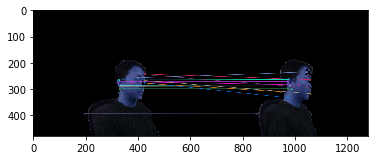

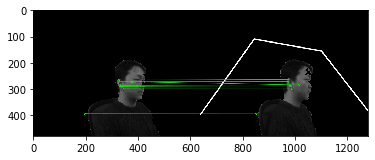

[0.057 0.205 0.988]
[0.044 0.184 0.959]


In [374]:
import multi_head

heads = multi_head.MultiHead.joined_heads(head1, head2)

print(head1.center_pos)
print(head2.center_pos)

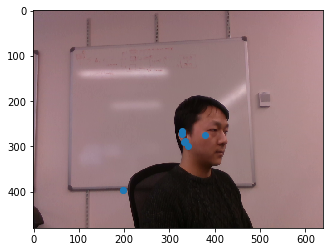

In [217]:
%matplotlib inline

test_img= (head1.twoD_image.copy())
plt.imshow(test_img)
plt.scatter(xy1[:,0],xy1[:,1])
plt.show()


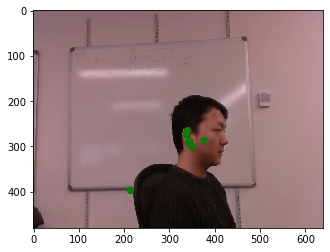

In [218]:
%matplotlib inline
test_img= (head2.twoD_image.copy())
plt.imshow(test_img)
plt.scatter(xy2[:,0],xy2[:,1],c='g')
plt.show()


In [286]:
from Procustes import *
A = head1.xyz_unfiltered[xyindex1][1:]
B = head2.xyz_unfiltered[xyindex2][1:]
print('----\n',A)
print('----\n',B)

c, R, t = umeyama(A, B)    
print ('c', c)
print ('R', R)
print ('t', t)

print('-------')
print('-------')
print('-------')
print(B.dot(c*R)+t)
print('-------')
print(A)

----
 [[-0.182  0.25   0.975]
 [ 0.025  0.061  1.02 ]
 [ 0.025  0.049  1.018]
 [ 0.033  0.09   1.017]
 [ 0.035  0.083  1.012]
 [ 0.048  0.104  1.012]
 [ 0.103  0.06   0.982]]
----
 [[-0.141  0.225  0.876]
 [ 0.037  0.057  0.99 ]
 [ 0.04   0.045  0.995]
 [ 0.048  0.085  0.994]
 [ 0.048  0.078  0.992]
 [ 0.058  0.103  0.995]
 [ 0.101  0.077  0.972]]
c 0.014560976129213317
R [[ 0.937  0.074  0.341]
 [-0.066  0.997 -0.035]
 [-0.343  0.011  0.939]]
t [0.032 0.094 0.96 ]
-------
-------
-------
[[0.026 0.097 0.971]
 [0.028 0.095 0.973]
 [0.028 0.095 0.973]
 [0.028 0.095 0.973]
 [0.028 0.095 0.973]
 [0.028 0.096 0.974]
 [0.029 0.095 0.973]]
-------
[[-0.182  0.25   0.975]
 [ 0.025  0.061  1.02 ]
 [ 0.025  0.049  1.018]
 [ 0.033  0.09   1.017]
 [ 0.035  0.083  1.012]
 [ 0.048  0.104  1.012]
 [ 0.103  0.06   0.982]]


In [323]:
d, Z, tform= procrustes(A, B, scaling=True, reflection='best')

R,c,t = tform['rotation'], tform['scale'], tform['translation']


print ("Check:  B*cR + t = A  is", np.allclose(B.dot(c*R) + t, A))
err = ((B.dot(c * R) + t - A) ** 2).sum()
print ("Residual error", err)

B.dot(c*R) + t

Check:  B*cR + t = A  is False
Residual error 0.0008615345895068555


array([[-0.182,  0.252,  0.971],
       [ 0.025,  0.058,  1.018],
       [ 0.029,  0.044,  1.021],
       [ 0.04 ,  0.086,  1.018],
       [ 0.039,  0.079,  1.016],
       [ 0.051,  0.104,  1.016],
       [ 0.084,  0.075,  0.977]])

In [320]:
dst_pts

array([-0.377,  0.036,  0.038])

In [275]:
from Procrustes2 import *
A = np.array([
  [0, 0, -1],
  [0, 0, 0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 0],
  [1, 0, 0],
])

B = np.array([
  [0, 0, 1],
  [0, 0, 0],
  [0, 0, -1],
  [0, 1, 0],
  [0, 1, 0],
  [-1, 0, 0],
])

In [278]:
d, Z, tform= procrustes(A, B, scaling=True, reflection='best')

R,c,t = tform['rotation'], tform['scale'], tform['translation']



print ("Check:  B*cR + t = A  is", np.allclose(B.dot(c*R) + t, a1))
err = ((B.dot(c * R) + t - A) ** 2).sum()
print ("Residual error", err)

In [267]:
R

array([[-1.000e+00,  8.865e-17, -8.574e-18],
       [ 1.009e-16,  1.000e+00,  2.715e-17],
       [ 8.574e-18,  2.715e-17, -1.000e+00]])

In [ ]:
from Procrustes2